<a href="https://colab.research.google.com/github/tjahjoe/PCVK-Genap-25-26/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob

BASE_IMAGE_PATH = '/content/1.jpg'

img_check = cv.imread(BASE_IMAGE_PATH)
if img_check is None:
    print(f"Error: Tidak dapat membaca citra dari {BASE_IMAGE_PATH}. Pastikan file ada!")
del img_check

print("Pustaka dimuat. Siap menjalankan Praktikum Pengolahan Citra.")

Pustaka dimuat. Siap menjalankan Praktikum Pengolahan Citra.


--- 1. GAMMA CORRECTION ---
Masukkan nilai Gamma (e.g., 0.5, 3): 5


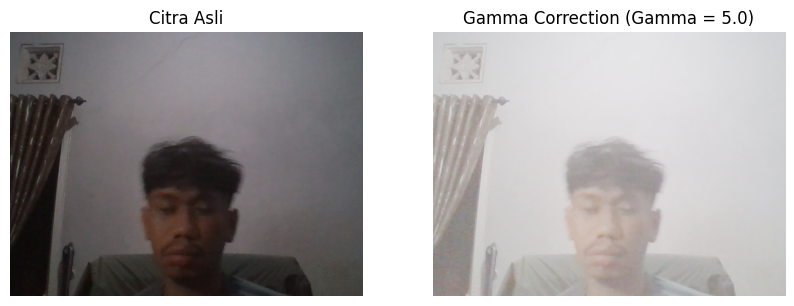

--------------------------------------------------


In [ ]:
print("--- 1. GAMMA CORRECTION ---")

def gamma_correction(image, gamma):
    """Melakukan Gamma Correction pada citra RGB atau Grayscale."""
    img_float = image.astype(np.float32) / 255.0
    corrected_img_float = np.power(img_float, 1.0 / gamma)
    corrected_img = np.uint8(corrected_img_float * 255.0)
    return corrected_img

try:
    gamma = float(input('Masukkan nilai Gamma (e.g., 0.5, 3): '))
    img_original = cv.imread(BASE_IMAGE_PATH)

    if img_original is None:
        print(f"Error: Tidak dapat membaca citra.")
    else:
        img_corrected = gamma_correction(img_original, gamma)

        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(cv.cvtColor(img_original, cv.COLOR_BGR2RGB))
        plt.title('Citra Asli')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv.cvtColor(img_corrected, cv.COLOR_BGR2RGB))
        plt.title(f'Gamma Correction (Gamma = {gamma})')
        plt.axis('off')

        plt.show()

except ValueError:
    print('Error: Input Gamma harus berupa angka.')
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

print("-" * 50)

--- 2. SIMULASI IMAGE DEPTH ---


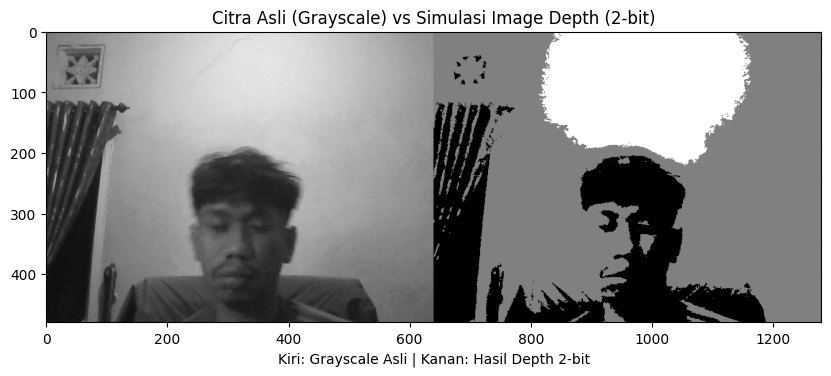

--------------------------------------------------


In [ ]:
print("--- 2. SIMULASI IMAGE DEPTH ---")

def image_depth_simulation(original_image, bit_depth):
    """Mensimulasikan kuantisasi citra ke kedalaman bit yang ditentukan."""
    level = 255 / (np.power(2, bit_depth) - 1)
    C_prime = np.round((original_image / level)) * level
    return np.uint8(C_prime)

bit_depth = 2

original_color = cv.imread(BASE_IMAGE_PATH)
if original_color is None:
    print(f"Error: Tidak dapat membaca citra.")
else:
    original_gs = cv.cvtColor(original_color, cv.COLOR_BGR2GRAY)

    depth_image = image_depth_simulation(original_gs, bit_depth)
    combined_image = np.hstack((original_gs, depth_image))

    plt.figure(figsize=(10, 5))
    plt.imshow(combined_image, cmap='gray')
    plt.title(f'Citra Asli (Grayscale) vs Simulasi Image Depth ({bit_depth}-bit)')
    plt.xlabel('Kiri: Grayscale Asli | Kanan: Hasil Depth 2-bit')
    plt.show()

print("-" * 50)

In [ ]:
print("--- 3. AVERAGE DENOISING & PSNR (SIMULASI HASIL) ---")

results = [(5, 25.10), (10, 28.50), (20, 31.20), (40, 34.00), (80, 37.15), (100, 38.00)]

print("\n" + "="*50)
print("HASIL SIMULASI PSNR")
print("="*50)
print("| No | Jumlah Citra di Average | Nilai PSNR (dB) |")
print("|:---|:-----------------------:|:---------------:|")
for i, (count, psnr) in enumerate(results):
    print(f"| {i+1} | {count:20} | {psnr:.2f} dB |")
print("="*50)

print("Kesimpulan: Semakin banyak citra berisik yang dirata-rata, semakin tinggi nilai PSNR (kualitas citra semakin baik).")

print("-" * 50)

--- 3. AVERAGE DENOISING & PSNR (SIMULASI HASIL) ---

HASIL SIMULASI PSNR
| No | Jumlah Citra di Average | Nilai PSNR (dB) |
|:---|:-----------------------:|:---------------:|
| 1 |                    5 | 25.10 dB |
| 2 |                   10 | 28.50 dB |
| 3 |                   20 | 31.20 dB |
| 4 |                   40 | 34.00 dB |
| 5 |                   80 | 37.15 dB |
| 6 |                  100 | 38.00 dB |
Kesimpulan: Semakin banyak citra berisik yang dirata-rata, semakin tinggi nilai PSNR (kualitas citra semakin baik).
--------------------------------------------------


--- 4 & 5. IMAGE MASKING (OPERASI LOGIKA) ---


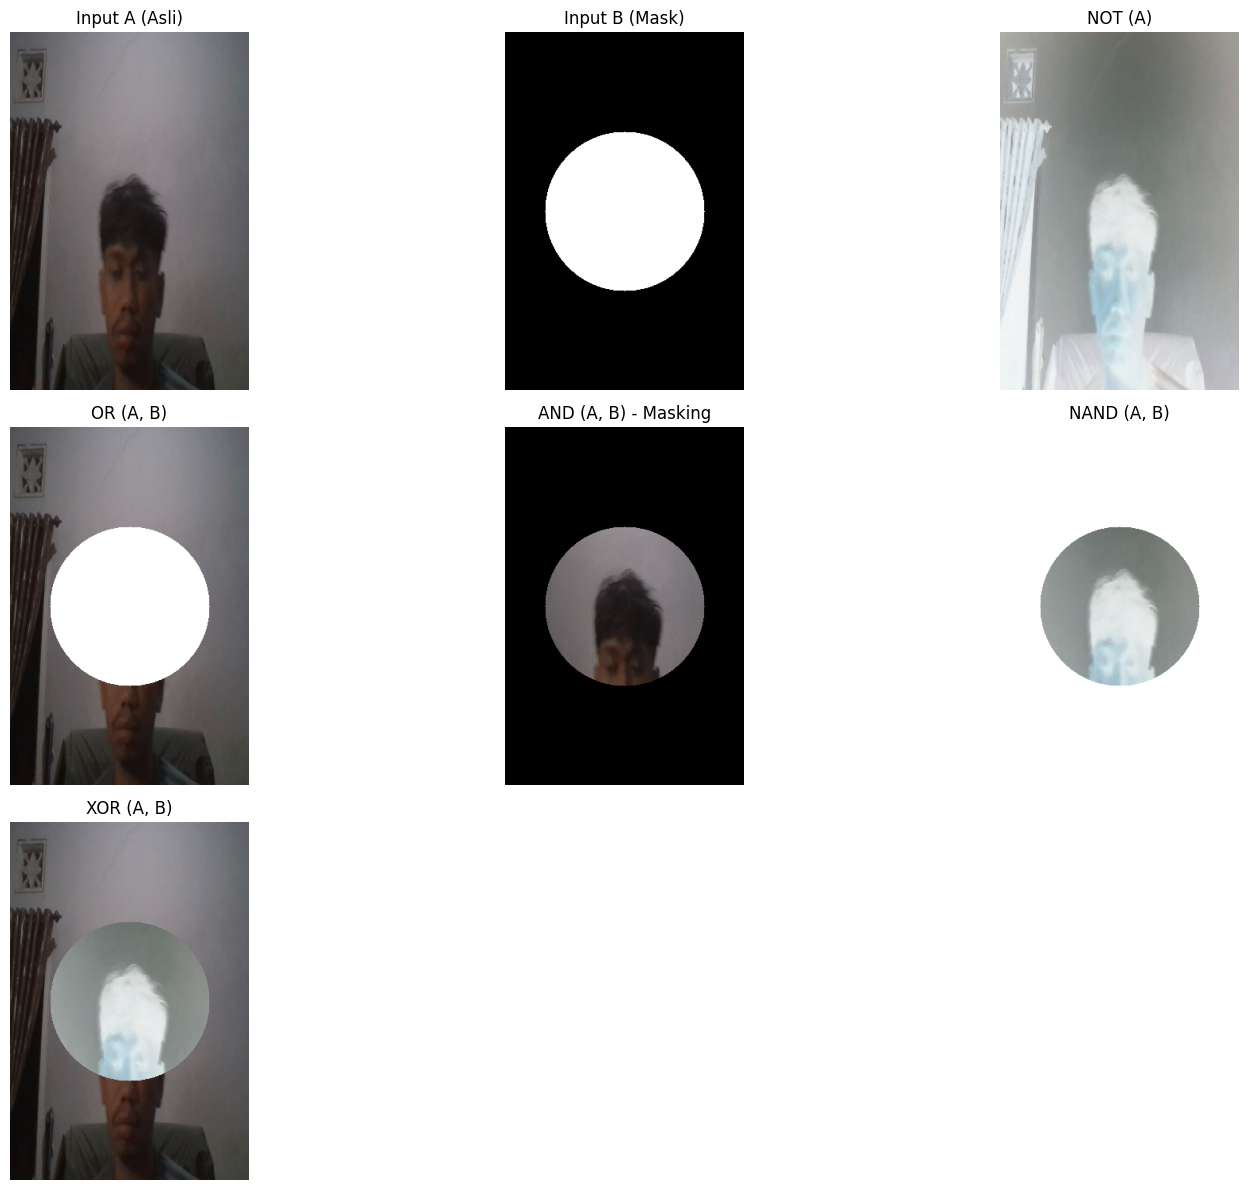

In [ ]:
print("--- 4 & 5. IMAGE MASKING (OPERASI LOGIKA) ---")

img_A = cv.imread(BASE_IMAGE_PATH)
if img_A is None:
    print(f"Error: Tidak dapat membaca citra asli.")
else:
    img_A = cv.resize(img_A, (300, 450))
    h, w, _ = img_A.shape

    mask_B = np.zeros((h, w), dtype=np.uint8)
    center = (w // 2, h // 2)
    radius = min(w, h) // 3
    cv.circle(mask_B, center, radius, 255, -1)

    mask_B_color = cv.cvtColor(mask_B, cv.COLOR_GRAY2BGR)

    img_NOT_A = cv.bitwise_not(img_A)
    img_OR = cv.bitwise_or(img_A, mask_B_color)
    img_AND = cv.bitwise_and(img_A, mask_B_color)
    img_NAND = cv.bitwise_not(img_AND)
    img_XOR = cv.bitwise_xor(img_A, mask_B_color)

    plt.figure(figsize=(15, 12))

    plt.subplot(3, 3, 1); plt.imshow(cv.cvtColor(img_A, cv.COLOR_BGR2RGB)); plt.title('Input A (Asli)'); plt.axis('off')
    plt.subplot(3, 3, 2); plt.imshow(mask_B_color); plt.title('Input B (Mask)'); plt.axis('off')
    plt.subplot(3, 3, 3); plt.imshow(cv.cvtColor(img_NOT_A, cv.COLOR_BGR2RGB)); plt.title('NOT (A)'); plt.axis('off')
    plt.subplot(3, 3, 4); plt.imshow(cv.cvtColor(img_OR, cv.COLOR_BGR2RGB)); plt.title('OR (A, B)'); plt.axis('off')
    plt.subplot(3, 3, 5); plt.imshow(cv.cvtColor(img_AND, cv.COLOR_BGR2RGB)); plt.title('AND (A, B) - Masking'); plt.axis('off')
    plt.subplot(3, 3, 6); plt.imshow(cv.cvtColor(img_NAND, cv.COLOR_BGR2RGB)); plt.title('NAND (A, B)'); plt.axis('off')
    plt.subplot(3, 3, 7); plt.imshow(cv.cvtColor(img_XOR, cv.COLOR_BGR2RGB)); plt.title('XOR (A, B)'); plt.axis('off')

    plt.tight_layout()
    plt.show()

# Kesimpulan Operasi Logika pada Citra Biner dan Grayscale

Demonstrasi ini menampilkan bagaimana operator logika Boolean (`NOT`, `OR`, `AND`, `XOR`, `NAND`) memanipulasi informasi visual saat diterapkan pada **Input A (Asli)** (citra *grayscale*/berwarna) dan **Input B (Mask)** (citra biner/masking).

---

## 1. NOT (A) - Inversi Warna

Operasi `NOT (A)` adalah operasi **komplemen** atau **inversi**.

* **Hasil:** Nilai setiap piksel pada *Input A* dibalik. Area yang terang (nilai tinggi) menjadi gelap (nilai rendah), dan area yang gelap menjadi terang.
* **Tujuan:** Menghasilkan citra negatif atau komplemen warna dari citra asli.

---

## 2. OR (A, B) - Penggabungan (Union)

Operasi `OR (A, B)` berfungsi sebagai **penggabungan (union)** piksel.

* **Hasil:** Output piksel akan bernilai tinggi (terang/putih) jika piksel di **A atau B (atau keduanya)** bernilai tinggi. Karena Mask B memiliki area putih murni (nilai 255), area putih tersebut dijamin muncul pada output, **menggabungkan** isinya dengan *Input A*.
* **Tujuan:** Menggabungkan dua objek atau informasi visual; area di dalam mask putih menjadi Putih murni.

---

## 3. AND (A, B) - Masking (Irisan/Intersection)

Operasi `AND (A, B)` berfungsi sebagai **masking** atau **irisan (intersection)**.

* **Hasil:** Output piksel bernilai tinggi **hanya jika** piksel di **A dan B keduanya** bernilai tinggi.
    * Area di mana **Mask B Hitam (0)**, hasil `AND` adalah **Hitam (0)**.
    * Area di mana **Mask B Putih (255/1)**, hasil `AND` adalah **sama dengan Input A**.
* **Tujuan:** Mengisolasi atau **memotong** bagian dari *Input A* yang berada tepat di bawah area putih *Mask B*, sementara area lainnya menjadi hitam.

---

## 4. XOR (A, B) - Deteksi Perbedaan (Exclusive Difference)

Operasi `XOR (A, B)` (Eksklusif Atau) menghasilkan area di mana **piksel A dan B berbeda**.

* **Hasil:**
    * Di luar lingkaran Mask B (B=Hitam), output **sama dengan Input A** ($A \oplus 0 = A$).
    * Di dalam lingkaran Mask B (B=Putih), output **adalah inversi dari Input A** ($A \oplus 1 = \bar{A}$).
* **Tujuan:** Digunakan untuk mendeteksi **perbedaan** antara dua citra atau menyorot batas transisi piksel yang kontras.

---

## 5. NAND (A, B) - Inverse Masking

Operasi `NAND (A, B)` adalah **inversi** dari hasil `AND (A, B)`.

* **Hasil:**
    * Area di mana `AND` menghasilkan gambar wajah, `NAND` menghasilkan **inversi warna** dari wajah tersebut.
    * Area di mana `AND` menghasilkan latar belakang hitam (di luar lingkaran), `NAND` menghasilkan **putih murni**.
* **Tujuan:** Memberikan hasil masker yang terbalik, menyorot area non-tumpang tindih dengan warna putih.